<a href="https://colab.research.google.com/github/Quark-hadron/Mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

In [ ]:
data = load_digits()

In [ ]:
x, y = data.data, data.target

In [ ]:
x[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

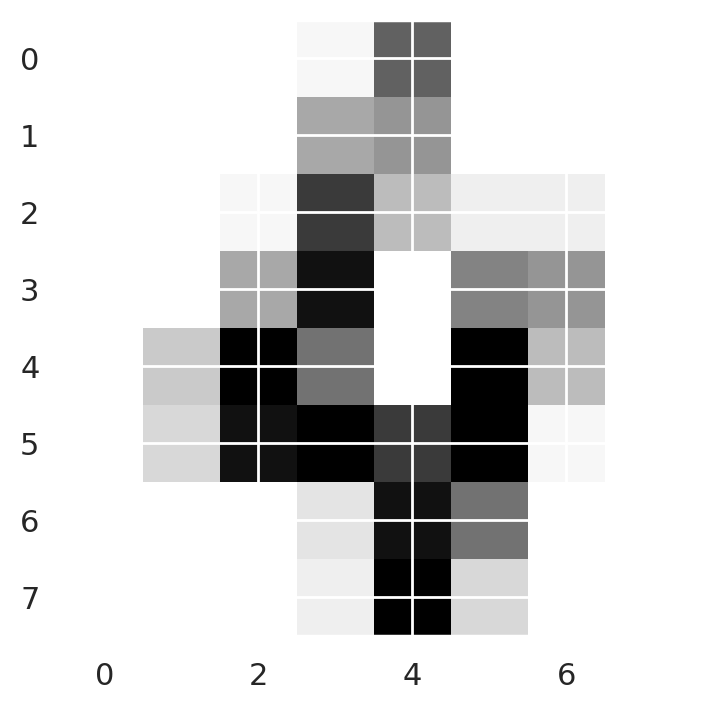

In [ ]:
f, ax = plt.subplots(1,sharey=True,figsize=(16,4))
ax.imshow(x[4].reshape([8,8]),cmap='Grays')

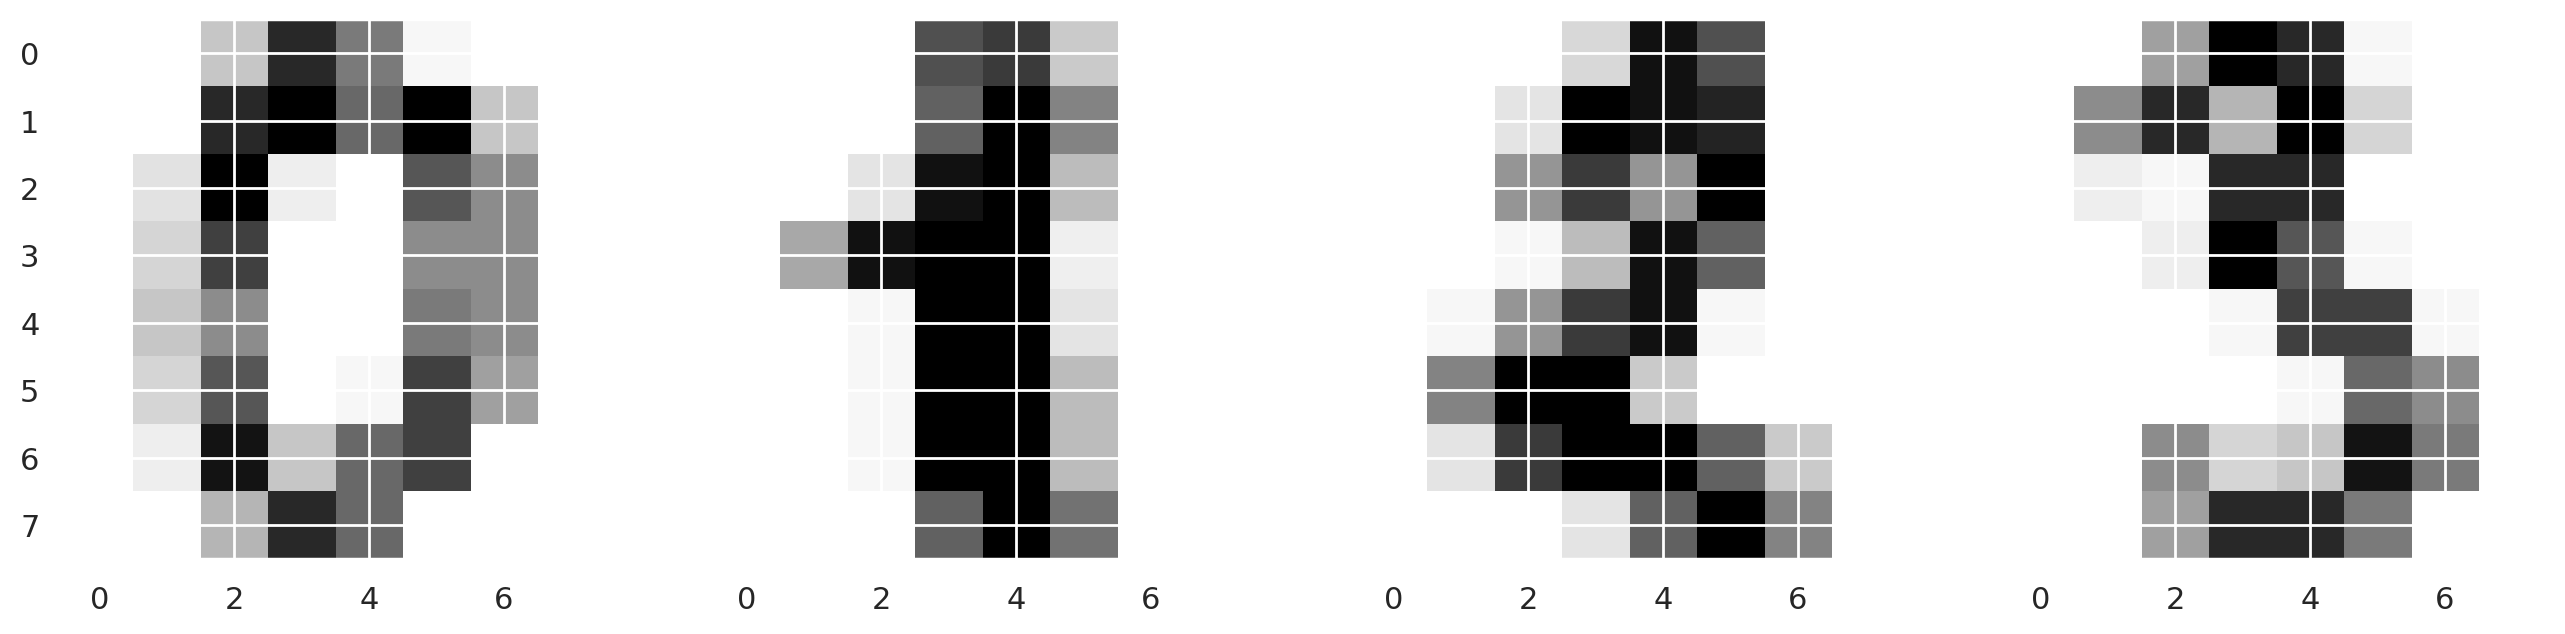

In [ ]:
f, ax = plt.subplots(1,4,sharey=True,figsize=(16,4))
for i in range(4):
  ax[i].imshow(x[i].reshape([8,8]),cmap='Greys')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.3)

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
knn_pipe = Pipeline(
    [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=10))]
    )

In [ ]:
clf_tree.fit(x_train,y_train)
knn_pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [ ]:
tree_pred = clf_tree.predict(x_test)
knn_pred = knn_pipe.predict(x_test)

In [ ]:
f'Tree:{accuracy_score(y_test,tree_pred)}---KNN:{accuracy_score(y_test,knn_pred)}'

'Tree:0.6851851851851852---KNN:0.9666666666666667'

In [ ]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        59
           1       0.51      0.41      0.45        49
           2       0.75      0.18      0.30        49
           3       0.53      0.77      0.62        64
           4       0.84      0.89      0.86        61
           5       0.90      0.94      0.92        47
           6       0.96      0.90      0.93        51
           7       0.93      0.67      0.78        57
           8       0.31      0.80      0.45        46
           9       0.86      0.33      0.48        57

    accuracy                           0.69       540
   macro avg       0.76      0.68      0.67       540
weighted avg       0.77      0.69      0.68       540



In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.92      0.96      0.94        49
           2       0.94      0.96      0.95        49
           3       1.00      0.95      0.98        64
           4       1.00      0.97      0.98        61
           5       0.94      0.98      0.96        47
           6       0.98      1.00      0.99        51
           7       0.93      0.98      0.96        57
           8       0.96      0.93      0.95        46
           9       0.98      0.93      0.95        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [ ]:
tree_params = {'max_depth':[1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features':[1, 2, 3, 5, 10, 20, 30, 50, 64]}

In [ ]:
tree_grid = GridSearchCV(clf_tree,tree_params,cv=5,n_jobs=-1,verbose=True)

In [ ]:
tree_grid.fit(x_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
             verbose=True)

In [ ]:
tree_grid.best_params_,tree_grid.best_score_

({'max_depth': 20, 'max_features': 30}, 0.8393347245936887)

In [ ]:
np.mean(
    cross_val_score(KNeighborsClassifier(n_neighbors=1),x,y,cv=5,n_jobs=-1)
)

0.9643933766635715

In [ ]:
np.mean(
    cross_val_score(RandomForestClassifier(random_state=1),x,y,cv=5,n_jobs=-1)
)

0.938243577839678

In [ ]:
def form_noisy_data(n_obj=1000, n_feat=100, random_seed=17):
    np.seed = random_seed
    y = np.random.choice([-1, 1], size=n_obj)
    x1 = 0.3 * y
    x_other = np.random.random(size=[n_obj, n_feat - 1])
    return np.hstack([x1.reshape([n_obj, 1]), x_other]), y

x, y = form_noisy_data()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1
)


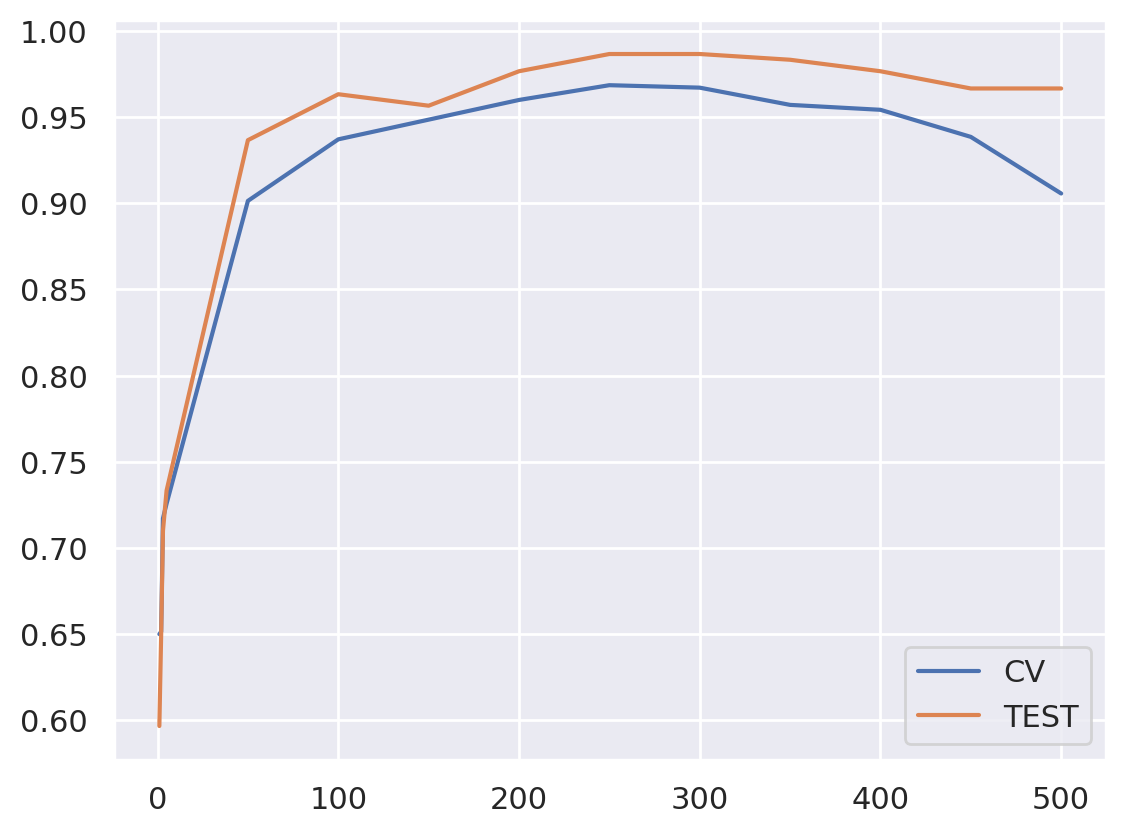

In [ ]:
cv_scores, test_scores = [], []

n_neighb = [1, 2, 3, 5] + list(range(50, 550, 50))
for k in n_neighb:
  knn_pipe = Pipeline(
      [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=k))]
  )
  cv_scores.append(np.mean(cross_val_score(knn_pipe,x_train,y_train,cv=5)))
  knn_pipe.fit(x_train,y_train)
  test_scores.append(accuracy_score(y_test,knn_pipe.predict(x_test)))

plt.plot(n_neighb,cv_scores,label='CV')
plt.plot(n_neighb,test_scores,label='TEST')
plt.legend();

In [ ]:
tree = DecisionTreeClassifier(random_state=1,max_depth=1)
tree_cv_scores = np.mean(cross_val_score(tree,x_train,y_train,cv=5))
tree.fit(x_train,y_train)
tree_test_scores = accuracy_score(y_test,tree.predict(x_test))
'Decision tree. CV: {}, holdout: {}'.format(tree_cv_scores,tree_test_scores)

'Decision tree. CV: 1.0, holdout: 1.0'